<a href="https://colab.research.google.com/github/vasudev006/S2Codebase/blob/main/EXPERIMENT_NO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXPERIMENT NO.4

Evaluating divergence and curl of a vector field

>**Case :** Find the divergence and curl of the vector field $F=xy \textbf{i}+yz  \textbf{j}+zx \textbf{k}$ and plot the vector fields.



---




######Solution

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

#N=CoordSys3D('N')

In [7]:
#Define the cordinate system
N=sp.vector.CoordSys3D('N')

F=(N.x*N.y)*N.i+(N.y*N.z)*N.j+(N.z*N.x)*N.k
F

N.x*N.y*N.i + N.y*N.z*N.j + N.x*N.z*N.k

In [8]:
#Compute the divergence
divergence_F=sp.vector.divergence(F)
divergence_F


N.x + N.y + N.z

In [10]:
#Compute the curl
curl_F=sp.vector.curl(F)
curl_F

(-N.y)*N.i + (-N.z)*N.j + (-N.x)*N.k

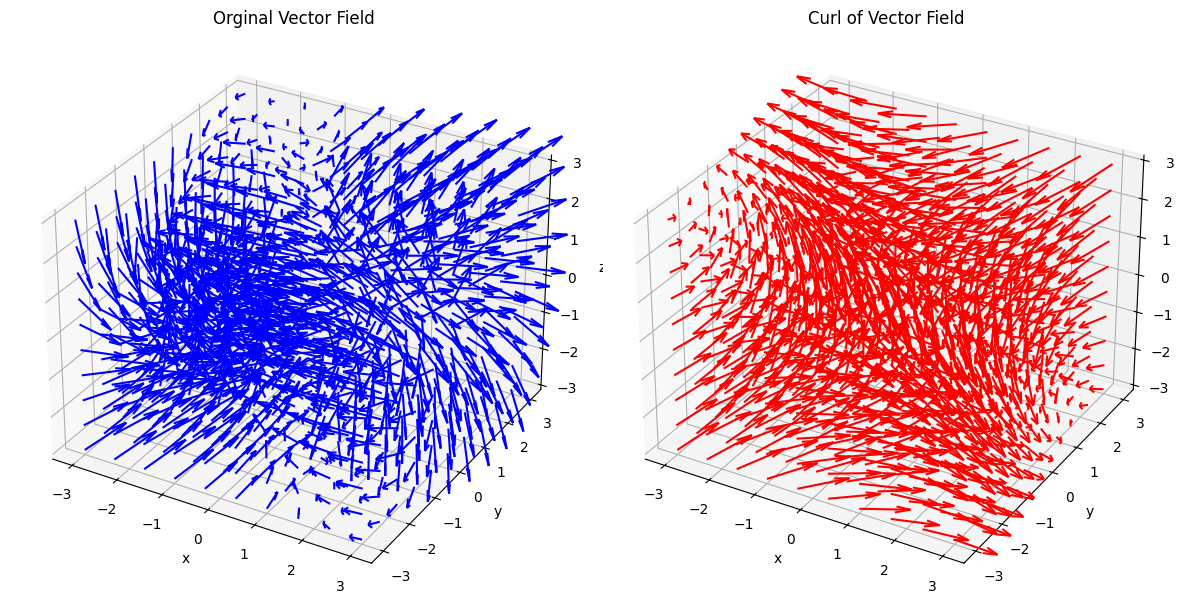

In [34]:
#Define the grid
x_vals=np.linspace(-3,3,10)
y_vals=np.linspace(-3,3,10)
z_vals=np.linspace(-3,3,10)
x,y,z=np.meshgrid(x_vals,y_vals,z_vals)

#Initialize arrays to store the vector field components
U=np.zeros_like(x)
V=np.zeros_like(y)
W=np.zeros_like(z)

#Initialize arrays to store the curl components
Curl_U=np.zeros_like(x)
Curl_V=np.zeros_like(y)
Curl_W=np.zeros_like(z)

#Evaluate tyhe vector field and curl at each grid point
for i in range(x.shape[0]):
  for j in range(x.shape[1]):
    for k in range(x.shape[2]):
      point={N.x:x[i,j,k],N.y:y[i,j,k],N.z:z[i,j,k]}
      F_evaluated =F.subs(point)
      U[i,j,k]=float(F_evaluated.dot(N.i))
      V[i,j,k]=float(F_evaluated.dot(N.j))
      W[i,j,k]=float(F_evaluated.dot(N.k))
      curl_evaluated=curl_F.subs(point)
      Curl_U[i,j,k]=float(curl_evaluated.dot(N.i))
      Curl_V[i,j,k]=float(curl_evaluated.dot(N.j))
      Curl_W[i,j,k]=float(curl_evaluated.dot(N.k))


#Plot thew orginal vector field

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(x,y,z,U,V,W,length=1,normalize=True,color=('b'))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Orginal Vector Field')

#Plot the curl of the vector field

ax2=fig.add_subplot(122,projection='3d')
ax2.quiver(x,y,z,Curl_U,Curl_V,Curl_W,length=1,normalize=True,color=('r'))
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Curl of Vector Field')

plt.tight_layout()
plt.show()